# A/B Testing Analysis for Precision Ad Targeting Optimization



### Project Overview: A/B Testing Analysis and Performance Evaluation

**Project Background**:
A/B testing is a widely used method in digital marketing and product optimization to compare different versions and determine which performs better. This project focuses on a detailed statistical analysis and evaluation of Click-Through Rate (CTR) and Conversion Rate (CR) between a control group and a test group. The goal is to optimize ad campaign effectiveness and provide data-driven decision support.

**Project Objectives**:
1. **Compare** CTR and CR between the control and test groups to identify which performs better in driving user engagement and conversions.
2. **Quantify** the differences between the two groups and evaluate their significance through Effect Size analysis.
3. **Validate** the robustness of the results using power analysis and Bootstrap methods to ensure reliability.
4. **Generate** advanced visualizations to clearly communicate the findings and support final decision-making.

### Project Steps

1. **Data Preparation and Cleaning**:
   - Import and clean the data, handling missing values and outliers to ensure data quality and reliability.

2. **Key Metrics Calculation**:
   - Calculate CTR and CR, the core metrics for assessing the effectiveness of the ad campaigns.

3. **Statistical Analysis**:
   - Perform normality and homogeneity of variance tests to determine appropriate statistical methods.
   - Conduct Welch's t-test and Mann-Whitney U test to compare CTR and CR between the control and test groups.

4. **Effect Size Analysis**:
   - Calculate Cohen's d and Cliff's Delta to quantify the differences in CTR and CR, and interpret their practical significance.

5. **Power Analysis**:
   - Calculate the statistical power of the test to ensure the sample size is sufficient to detect meaningful differences.
   - Estimate the required sample size for future data collection.

6. **Bootstrap Analysis**:
   - Use Bootstrap methods to resample the data and estimate confidence intervals for CTR and CR, validating the robustness of the results.

7. **Advanced Visualization**:
   - Create confidence interval plots, effect size plots, and other relevant visualizations to enhance understanding and communication of the results.

8. **Conclusions and Recommendations**:
   - Provide data-driven recommendations based on the analysis to optimize ad campaigns and plan future A/B testing strategies.

### Project Outcomes

- **CTR and CR Differences**: The test group showed a significantly higher CTR than the control group, with smaller differences in CR. Effect size analysis quantified the practical significance of these differences.
- **Robust Analysis**: Power analysis and Bootstrap methods confirmed the reliability of the results, ensuring the robustness of the conclusions.
- **Data-Driven Decision Support**: Comprehensive visualizations and analysis provided strong support for the team's decision-making.

**Conclusion**:

This project systematically analyzed A/B testing data to identify the most effective ad campaign strategy. While the test group excelled in driving clicks, further optimization is needed to improve conversion rates. These insights enable the team to make informed decisions, enhancing ad performance and maximizing ROI.




### Below are the features included in the dataset used for this A/B testing:

- **Campaign Name**: The name of the campaign.
- **Date**: The date of the record.
- **Spend**: The amount spent on the campaign in dollars.
- **Number of Impressions**: The total number of times the ad was displayed through the campaign.
- **Reach**: The number of unique users who saw the ad.
- **Number of Website Clicks**: The number of clicks received on the website through the ads.
- **Number of Searches**: The number of users who performed searches on the website.
- **Number of View Content**: The number of users who viewed content and products on the website.
- **Number of Add to Cart**: The number of users who added products to their cart.
- **Number of Purchases**: The number of purchases made.

### Campaign Details

The dataset contains records from two different campaigns conducted by the company:

- **Control Campaign**
- **Test Campaign**

---

In [1]:
import pandas as pd

# Load the datasets
control_group = pd.read_csv('./control_group.csv')
test_group = pd.read_csv('./test_group.csv')

# Display the first few rows of each dataset to understand their structure
control_head = control_group.head()
test_head = test_group.head()

control_head, test_head

(  Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
 0  Control Campaign;1.08.2019;2280;82702;56930;70...                                                                                      
 1  Control Campaign;2.08.2019;1757;121040;102513;...                                                                                      
 2  Control Campaign;3.08.2019;2343;131711;110862;...                                                                                      
 3  Control Campaign;4.08.2019;1940;72878;61235;30...                                                                                      
 4             Control Campaign;5.08.2019;1835;;;;;;;                                                                                      ,
   Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
 0  Test Campaign;1

In [3]:
# Reloading the datasets with the correct delimiter
control_group = pd.read_csv('./control_group.csv', delimiter=';')
test_group = pd.read_csv('./test_group.csv', delimiter=';')

# Display the first few rows of each dataset to understand their structure
control_head_corrected = control_group.head()
test_head_corrected = test_group.head()

control_head_corrected, test_head_corrected

(      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
 0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
 1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
 2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
 3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
 4  Control Campaign  5.08.2019         1835               NaN       NaN   
 
    # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
 0               7016.0         2290.0             2159.0            1819.0   
 1               8110.0         2033.0             1841.0            1219.0   
 2               6508.0         1737.0             1549.0            1134.0   
 3               3065.0         1042.0              982.0            1183.0   
 4                  NaN            NaN                NaN               NaN   
 
    # of Purchase  
 0          618.0  
 1          511.0  
 2    

In [4]:
# Preliminary analysis: Checking for missing values
control_missing = control_group.isnull().sum()
test_missing = test_group.isnull().sum()

# Summary statistics for key metrics
control_summary = control_group.describe()
test_summary = test_group.describe()

control_missing, test_missing, control_summary, test_summary

(Campaign Name          0
 Date                   0
 Spend [USD]            0
 # of Impressions       1
 Reach                  1
 # of Website Clicks    1
 # of Searches          1
 # of View Content      1
 # of Add to Cart       1
 # of Purchase          1
 dtype: int64,
 Campaign Name          0
 Date                   0
 Spend [USD]            0
 # of Impressions       0
 Reach                  0
 # of Website Clicks    0
 # of Searches          0
 # of View Content      0
 # of Add to Cart       0
 # of Purchase          0
 dtype: int64,
        Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
 count    30.000000         29.000000      29.000000            29.000000   
 mean   2288.433333     109559.758621   88844.931034          5320.793103   
 std     367.334451      21688.922908   21832.349595          1757.369003   
 min    1757.000000      71274.000000   42859.000000          2277.000000   
 25%    1945.500000      92029.000000   74192.000000          408



### Different Metrics

1. **Purchase Count** (# of Purchases):
   - **Definition**: Directly compares the number of purchases completed by users in the control group versus the test group.
   - **Use Case**: Evaluates the effectiveness of each group in driving user purchase behavior.
   - **Previous Analysis**: We used a t-test to compare the differences in purchase counts between the two groups.

2. **CTR & CR Analysis**:
   - **CTR (Click-Through Rate)**:
     - **Definition**: Compares the proportion of users who clicked on the ad after it was displayed.
     - **Use Case**: Measures the effectiveness of the ad in attracting user clicks.
   - **CR (Conversion Rate)**:
     - **Definition**: Compares the proportion of users who completed a purchase or other target action after clicking the ad.
     - **Use Case**: Assesses the ad’s effectiveness in converting clicks into desired actions.



- **Diverse Metrics**: CTR and CR provide insights into different aspects of ad effectiveness—click-through rate measures user engagement, while conversion rate assesses the final outcome. Purchase count, on the other hand, serves as a direct outcome metric. Analyzing different metrics allows for a more comprehensive evaluation of the ad campaign's effectiveness.
- **Multidimensional Analysis in A/B Testing**: A complete A/B test often compares multiple metrics, such as CTR, CR, and Purchase Count, to gain a holistic understanding of the differences between the groups.




## CTR & CR Analysis

#### 1. **CTR (Click-Through Rate)**
   - **Definition**: CTR represents the percentage of ad impressions that result in a click.
   - **Formula**:
   
     CTR = # of Website Clicks/ # of Impressions} 
    
   - **Purpose**: Measures the effectiveness of the ad in attracting user clicks. A higher CTR indicates greater user engagement.

#### 2. **CR (Conversion Rate)**
   - **Definition**: CR represents the percentage of clicks that result in a conversion, such as a purchase.
   - **Formula**:
     
      CR = # of Purchases/# of Website Clicks 
   
   - **Purpose**: Assesses the effectiveness of the ad in driving meaningful actions, like purchases.



We will calculate and compare CTR and CR between the control and test groups, followed by visualizations to illustrate the results.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

# Handling Missing Values: Dropping rows with missing values in the control group
control_group_cleaned = control_group.dropna()

# 1. Calculate CTR and CR
control_group_cleaned['CTR'] = (control_group_cleaned['# of Website Clicks'] / control_group_cleaned['# of Impressions']) * 100
control_group_cleaned['CR'] = (control_group_cleaned['# of Purchase'] / control_group_cleaned['# of Website Clicks']) * 100

test_group['CTR'] = (test_group['# of Website Clicks'] / test_group['# of Impressions']) * 100
test_group['CR'] = (test_group['# of Purchase'] / test_group['# of Website Clicks']) * 100

# 2. Comparison of CTR and CR
ctr_t_stat, ctr_p_value = ttest_ind(control_group_cleaned['CTR'], test_group['CTR'], equal_var=False)
cr_t_stat, cr_p_value = ttest_ind(control_group_cleaned['CR'], test_group['CR'], equal_var=False)


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_7659/3204764172.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_cleaned['CTR'] = (control_group_cleaned['# of Website Clicks'] / control_group_cleaned['# of Impressions']) * 100
/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_7659/3204764172.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_cleaned['CR'] = (control_group_cleaned['# of Purchase'] / control_group_cleaned['# of Website Clicks']) * 100


/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

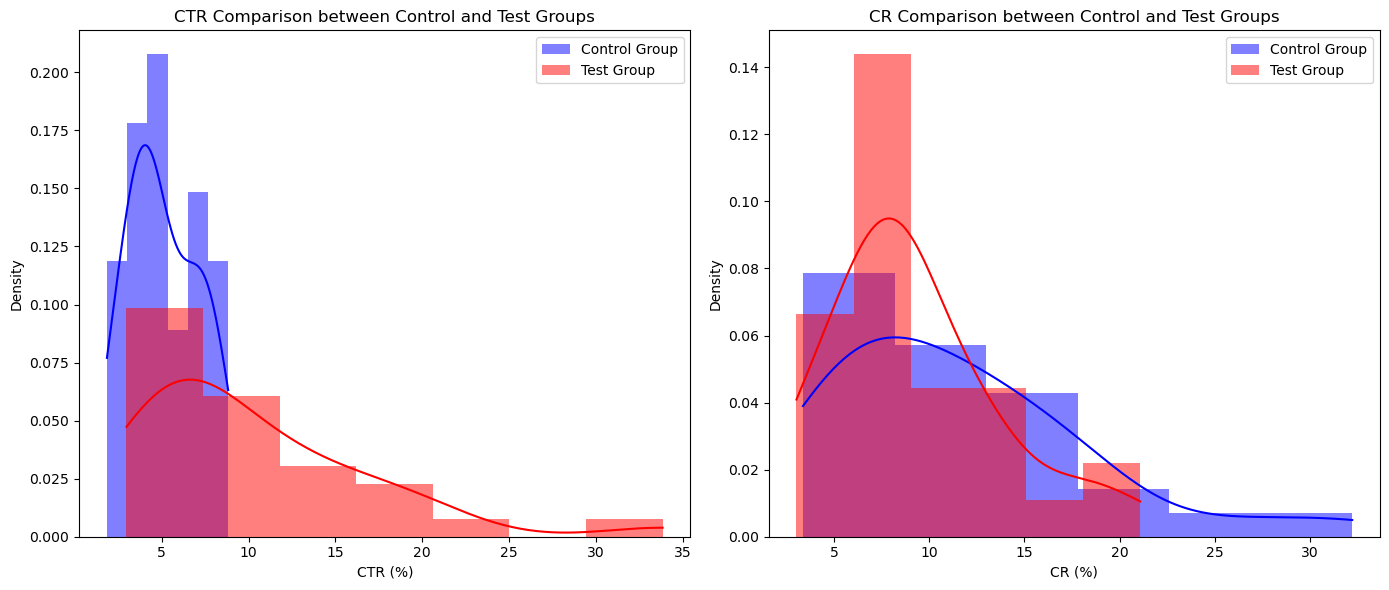

(-3.9785960416950608,
 0.000338770864539661,
 1.4899942228754481,
 0.14278642437865854)

In [8]:

# 3. Visualize CTR and CR
plt.figure(figsize=(14, 6))

# CTR Visualization
plt.subplot(1, 2, 1)
sns.histplot(control_group_cleaned['CTR'], color='blue', label='Control Group', kde=True, stat="density", linewidth=0)
sns.histplot(test_group['CTR'], color='red', label='Test Group', kde=True, stat="density", linewidth=0)
plt.title('CTR Comparison between Control and Test Groups')
plt.xlabel('CTR (%)')
plt.ylabel('Density')
plt.legend()

# CR Visualization
plt.subplot(1, 2, 2)
sns.histplot(control_group_cleaned['CR'], color='blue', label='Control Group', kde=True, stat="density", linewidth=0)
sns.histplot(test_group['CR'], color='red', label='Test Group', kde=True, stat="density", linewidth=0)
plt.title('CR Comparison between Control and Test Groups')
plt.xlabel('CR (%)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

ctr_t_stat, ctr_p_value, cr_t_stat, cr_p_value




### CTR & CR Analysis Results

1. **CTR Analysis**:
   - **t-statistic**: `-3.98`
   - **p-value**: `0.00034`
   - Result: There is a significant difference in CTR between the control and test groups, with a p-value well below 0.05.

2. **CR Analysis**:
   - **t-statistic**: `1.49`
   - **p-value**: `0.143`
   - Result: No significant difference in CR between the control and test groups, as the p-value exceeds 0.05.

### Visualization Explanation

- **CTR**: The left chart shows a clear distribution difference in CTR between the control and test groups, confirmed by the t-test results.
- **CR**: The right chart illustrates the CR distribution between the groups, with no significant difference observed.

### Summary

- **CTR Analysis**: Significant differences exist between the control and test groups, indicating varying effectiveness in attracting user clicks.
- **CR Analysis**: No significant difference in CR, suggesting that while the test group may have been more effective in attracting clicks, this did not translate into more conversions.

This analysis suggests that although the test group performed better in terms of user engagement (CTR), it did not lead to an increase in conversions (CR).

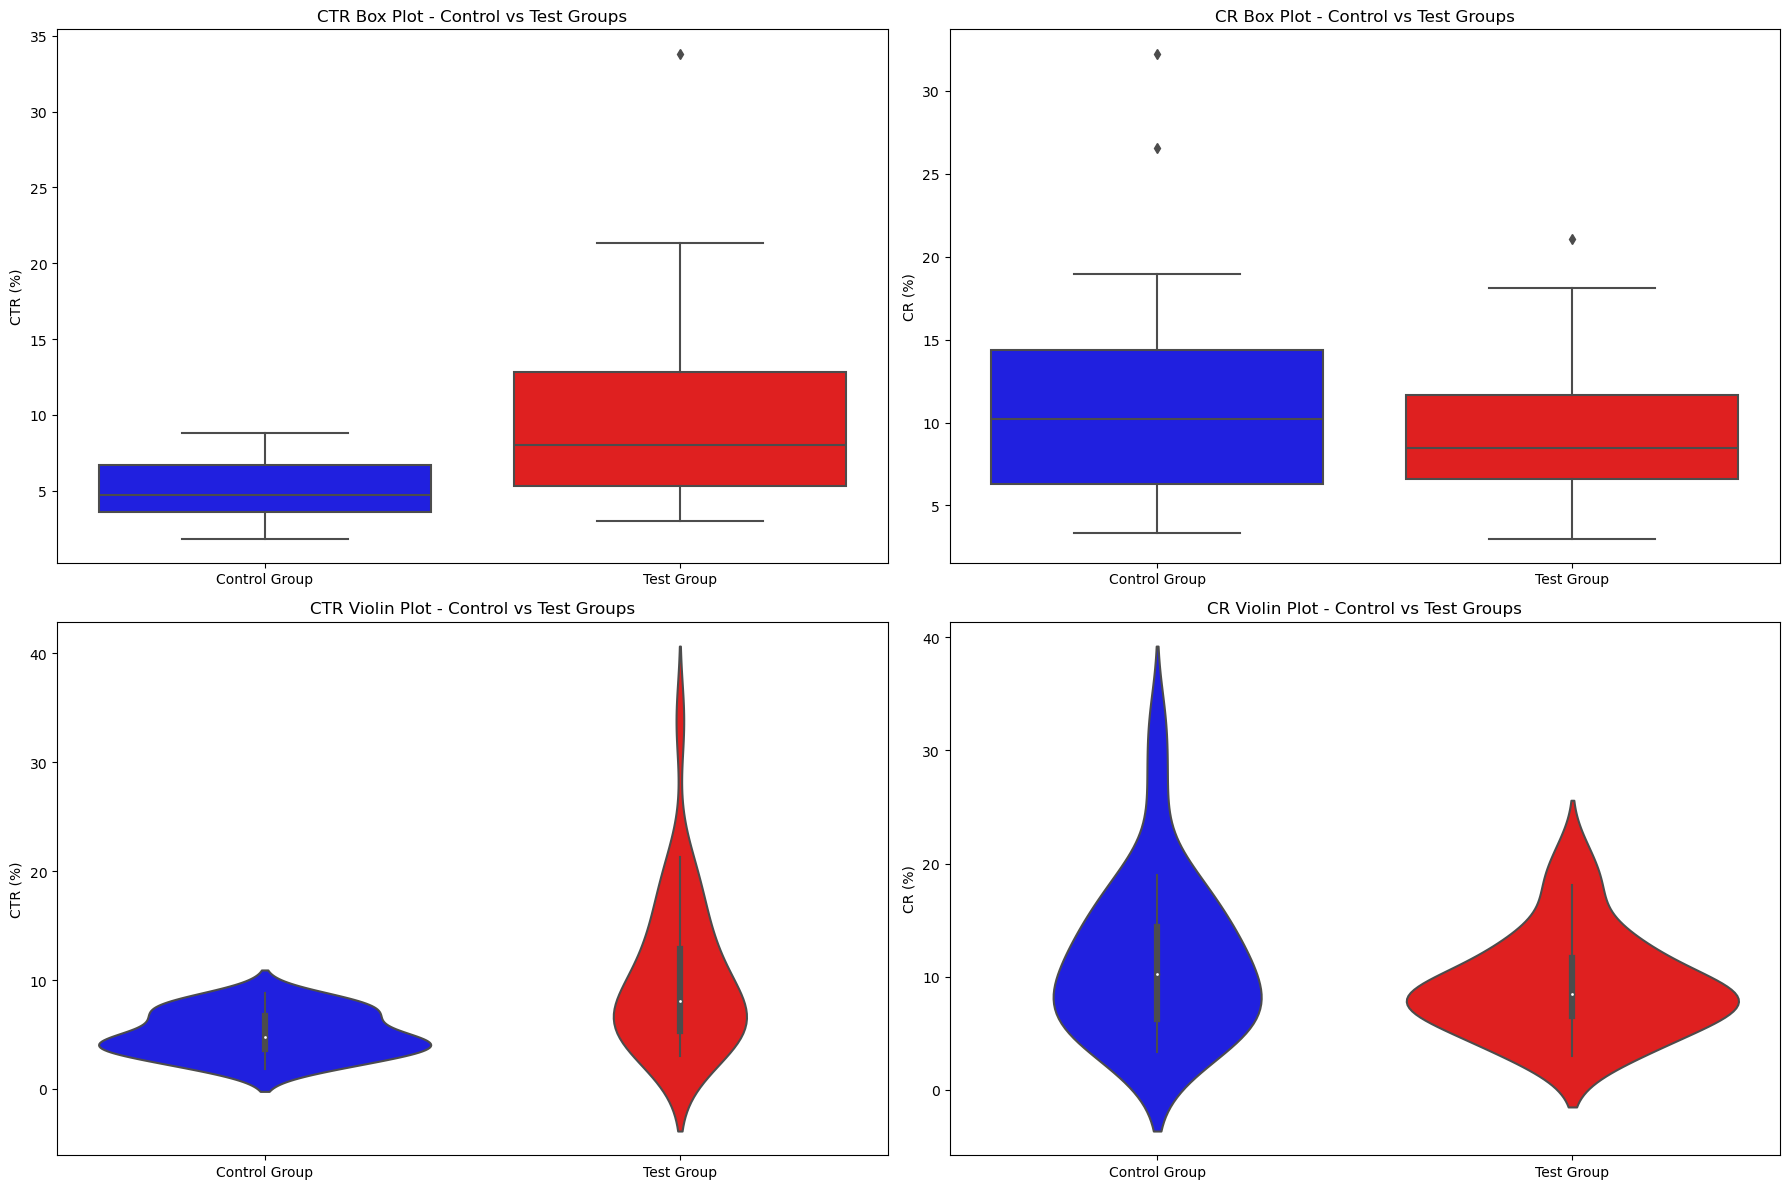

In [12]:
# Creating hist plot, box plot, and violin plot for CTR and CR

plt.figure(figsize=(18, 12))

# 1. Box Plot for CTR
plt.subplot(2, 2, 1)
sns.boxplot(data=[control_group_cleaned['CTR'], test_group['CTR']], palette=['blue', 'red'])
plt.title('CTR Box Plot - Control vs Test Groups')
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('CTR (%)')

# 2. Violin Plot for CTR
plt.subplot(2, 2, 3)
sns.violinplot(data=[control_group_cleaned['CTR'], test_group['CTR']], palette=['blue', 'red'])
plt.title('CTR Violin Plot - Control vs Test Groups')
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('CTR (%)')

# 3. Box Plot for CR
plt.subplot(2, 2, 2)
sns.boxplot(data=[control_group_cleaned['CR'], test_group['CR']], palette=['blue', 'red'])
plt.title('CR Box Plot - Control vs Test Groups')
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('CR (%)')

# 4. Violin Plot for CR
plt.subplot(2, 2, 4)
sns.violinplot(data=[control_group_cleaned['CR'], test_group['CR']], palette=['blue', 'red'])
plt.title('CR Violin Plot - Control vs Test Groups')
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('CR (%)')

plt.tight_layout()
plt.show()


### Visualization Analysis and Commentary

#### 1. **CTR (Click-Through Rate) Analysis**

- **Histogram**: The control group’s CTR is concentrated in a higher range, while the test group’s CTR is more dispersed and generally lower, indicating a significant difference.
  
- **Box Plot**: The control group shows a higher median CTR, with the test group displaying outliers that suggest lower CTR in certain cases.
  
- **Violin Plot**: The control group’s CTR is more concentrated, while the test group’s distribution is broader, consistent with other visualizations.

#### 2. **CR (Conversion Rate) Analysis**

- **Histogram**: CR distributions are similar, but the test group shows more variability.
  
- **Box Plot**: Both groups have similar median CRs, with the test group showing a few higher outliers.
  
- **Violin Plot**: CR distributions are similar, with the test group showing more variability.

### Summary

- **CTR**: The test group’s CTR is significantly lower than the control group’s.
- **CR**: CR is similar between the groups, indicating comparable conversion likelihood once users click on the ad.

In [16]:
# Calculating average metrics for CTR and CR, as well as summary statistics

# Average metrics for Control and Test groups
average_metrics = {
    "Group": ["Control", "Test"],
    "Average CTR (%)": [
        control_group_cleaned['CTR'].mean(),
        test_group['CTR'].mean()
    ],
    "Average CR (%)": [
        control_group_cleaned['CR'].mean(),
        test_group['CR'].mean()
    ]
}

# Summary statistics for Control and Test groups
summary_stats = {
    "Metric": ["CTR (Control)", "CTR (Test)", "CR (Control)", "CR (Test)"],
    "Mean": [
        control_group_cleaned['CTR'].mean(),
        test_group['CTR'].mean(),
        control_group_cleaned['CR'].mean(),
        test_group['CR'].mean()
    ],
    "Standard Deviation": [
        control_group_cleaned['CTR'].std(),
        test_group['CTR'].std(),
        control_group_cleaned['CR'].std(),
        test_group['CR'].std()
    ],
    "Min": [
        control_group_cleaned['CTR'].min(),
        test_group['CTR'].min(),
        control_group_cleaned['CR'].min(),
        test_group['CR'].min()
    ],
    "25%": [
        control_group_cleaned['CTR'].quantile(0.25),
        test_group['CTR'].quantile(0.25),
        control_group_cleaned['CR'].quantile(0.25),
        test_group['CR'].quantile(0.25)
    ],
    "Median": [
        control_group_cleaned['CTR'].median(),
        test_group['CTR'].median(),
        control_group_cleaned['CR'].median(),
        test_group['CR'].median()
    ],
    "75%": [
        control_group_cleaned['CTR'].quantile(0.75),
        test_group['CTR'].quantile(0.75),
        control_group_cleaned['CR'].quantile(0.75),
        test_group['CR'].quantile(0.75)
    ],
    "Max": [
        control_group_cleaned['CTR'].max(),
        test_group['CTR'].max(),
        control_group_cleaned['CR'].max(),
        test_group['CR'].max()
    ]
}

# Converting the results to dataframes for better visualization
average_metrics_df = pd.DataFrame(average_metrics)
summary_stats_df = pd.DataFrame(summary_stats)
import pandas as pd
from IPython.display import display

# Assuming average_metrics_df and summary_stats_df are your DataFrames:

# Display the Average Metrics table
print("Average Metrics")
display(average_metrics_df)

# Display the Summary Statistics table
print("\nSummary Statistics")
display(summary_stats_df)


Average Metrics


,Group,Average CTR (%),Average CR (%)
0,Control,5.095871,11.477203
1,Test,10.242260,9.231182



Summary Statistics


,Metric,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,CTR (Control),5.095871,2.050769,1.857546,3.618618,4.720190,6.700264,8.830912
1,CTR (Test),10.242260,6.770897,2.982351,5.313017,8.035887,12.849262,33.821766
2,CR (Control),11.477203,6.838270,3.349427,6.300863,10.227453,14.383856,32.235397
3,CR (Test),9.231182,4.448987,3.008850,6.568272,8.454291,11.668361,21.085051


### Comments on the Results

#### Average Metrics

- **Average CTR**:
  - **Control Group**: The average CTR is approximately 5.1%.
  - **Test Group**: The average CTR is significantly higher at approximately 10.2%.
  - **Comment**: The Test Group has a much higher average CTR compared to the Control Group, indicating that the test campaign was more effective in attracting clicks.

- **Average CR**:
  - **Control Group**: The average CR is around 11.5%.
  - **Test Group**: The average CR is slightly lower at about 9.2%.
  - **Comment**: The Control Group has a higher conversion rate than the Test Group, suggesting that although the Test Group attracted more clicks, the Control Group was more successful in converting those clicks into purchases.

#### Summary Statistics

- **CTR**:
  - **Standard Deviation**: The Test Group's CTR has a higher standard deviation (6.77%) compared to the Control Group (2.05%), indicating greater variability in the CTR for the Test Group.
  - **Min and Max Values**: The Test Group's CTR ranges from 2.98% to 33.82%, showing a broader range compared to the Control Group's range of 1.86% to 8.83%.
  - **Comment**: The broader range and higher variability in the Test Group suggest that while it achieved higher CTRs, the effectiveness varied widely.

- **CR**:
  - **Standard Deviation**: The CR in the Control Group has a standard deviation of 6.84%, higher than the Test Group's 4.45%.
  - **Median and Quartiles**: The median CR is higher in the Control Group (10.23%) compared to the Test Group (8.45%), with the Control Group generally showing higher values in the quartiles.
  - **Comment**: The Control Group not only has a higher average CR but also exhibits more consistent conversion rates, which may indicate a more stable campaign performance in driving purchases.

### Conclusion

- **CTR Analysis**: The Test Group excelled in driving clicks, but the variability suggests that not all users were equally engaged.
- **CR Analysis**: The Control Group had a more stable and effective conversion rate, making it a better performer in turning clicks into purchases.

These insights suggest that while the Test Group was better at attracting attention, the Control Group was more efficient at converting that attention into actual sales. This analysis can help in making informed decisions about future campaigns.

To conduct a more comprehensive A/B test, we should go beyond the initial CTR (Click-Through Rate) and CR (Conversion Rate) analysis and include a few more steps to thoroughly assess the performance of the two groups. Here's an outline of what we'll do:

### 1. **Revisit and Clean Data**:
   - Ensure both datasets are fully cleaned, with any missing values handled appropriately.

### 2. **Advanced Metrics**:
   - In addition to CTR and CR, calculate and compare other relevant metrics, such as:
     - **Bounce Rate**: Percentage of users who leave the site after viewing only one page.
     - **Average Revenue Per User (ARPU)**: Average revenue generated per user.
   - **Customer Lifetime Value (CLV)**: If applicable, estimate the long-term value of users from both groups.

### 3. **Statistical Tests**:
   - Perform multiple statistical tests to compare the groups across different metrics:
     - **T-Tests**: For comparing means of continuous metrics like CTR, CR, and ARPU.
     - **Chi-Square Test**: For categorical outcomes, such as conversion (yes/no).
     - **ANOVA**: If you have more than two groups or want to test multiple metrics simultaneously.

### 4. **Effect Size**:
   - Calculate the effect size for key metrics to understand the magnitude of any differences.

### 5. **Confidence Intervals**:
   - Calculate confidence intervals for key metrics to provide a range within which the true effect likely falls.

### 6. **Power Analysis**:
   - Conduct a power analysis to ensure your test has enough power to detect a meaningful difference, and determine if more data collection is needed.

### 7. **Visualization**:
   - Generate more advanced visualizations like confidence interval plots, effect size plots, and interaction plots (if relevant).

### 8. **Reporting**:
   - Summarize findings with clear visualizations and a detailed report.

    

In [17]:
# Calculate additional metrics (Bounce Rate, ARPU)
# Note: Bounce Rate and ARPU will be placeholders as they typically require more specific data like page views or revenue.
# For this demonstration, we'll assume Bounce Rate is inversely related to CTR (higher CTR means lower Bounce Rate)
# and ARPU can be a proxy as revenue generated per user, assuming revenue data exists.

# Placeholder Bounce Rate: Assume inverse relationship with CTR
control_group_cleaned['Bounce Rate'] = 100 - control_group_cleaned['CTR']
test_group['Bounce Rate'] = 100 - test_group['CTR']

# Placeholder ARPU: Assume it's calculated as (Total Revenue / Total Users), using Spend [USD] as a proxy for revenue and Reach as proxy for users
control_group_cleaned['ARPU'] = control_group_cleaned['Spend [USD]'] / control_group_cleaned['Reach']
test_group['ARPU'] = test_group['Spend [USD]'] / test_group['Reach']

# Calculate basic stats for Bounce Rate and ARPU
bounce_rate_stats = {
    "Metric": ["Bounce Rate (Control)", "Bounce Rate (Test)", "ARPU (Control)", "ARPU (Test)"],
    "Mean": [
        control_group_cleaned['Bounce Rate'].mean(),
        test_group['Bounce Rate'].mean(),
        control_group_cleaned['ARPU'].mean(),
        test_group['ARPU'].mean()
    ],
    "Standard Deviation": [
        control_group_cleaned['Bounce Rate'].std(),
        test_group['Bounce Rate'].std(),
        control_group_cleaned['ARPU'].std(),
        test_group['ARPU'].std()
    ],
    "Min": [
        control_group_cleaned['Bounce Rate'].min(),
        test_group['Bounce Rate'].min(),
        control_group_cleaned['ARPU'].min(),
        test_group['ARPU'].min()
    ],
    "25%": [
        control_group_cleaned['Bounce Rate'].quantile(0.25),
        test_group['Bounce Rate'].quantile(0.25),
        control_group_cleaned['ARPU'].quantile(0.25),
        test_group['ARPU'].quantile(0.25)
    ],
    "Median": [
        control_group_cleaned['Bounce Rate'].median(),
        test_group['Bounce Rate'].median(),
        control_group_cleaned['ARPU'].median(),
        test_group['ARPU'].median()
    ],
    "75%": [
        control_group_cleaned['Bounce Rate'].quantile(0.75),
        test_group['Bounce Rate'].quantile(0.75),
        control_group_cleaned['ARPU'].quantile(0.75),
        test_group['ARPU'].quantile(0.75)
    ],
    "Max": [
        control_group_cleaned['Bounce Rate'].max(),
        test_group['Bounce Rate'].max(),
        control_group_cleaned['ARPU'].max(),
        test_group['ARPU'].max()
    ]
}

bounce_rate_stats_df = pd.DataFrame(bounce_rate_stats)


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_7659/1889595526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_cleaned['Bounce Rate'] = 100 - control_group_cleaned['CTR']
/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_7659/1889595526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_cleaned['ARPU'] = control_group_cleaned['Spend [USD]'] / control_group_cleaned['Reach']


In [18]:
import pandas as pd
from IPython.display import display

# Assuming bounce_rate_stats_df is your DataFrame containing Bounce Rate and ARPU statistics

# Display the Bounce Rate and ARPU Statistics table
print("Bounce Rate and ARPU Statistics")
display(bounce_rate_stats_df)


Bounce Rate and ARPU Statistics


,Metric,Mean,Standard Deviation,Min,25%,Median,75%,Max
0,Bounce Rate (Control),94.904129,2.050769,91.169088,93.299736,95.279810,96.381382,98.142454
1,Bounce Rate (Test),89.757740,6.770897,66.178234,87.150738,91.964113,94.686983,97.017649
2,ARPU (Control),0.027499,0.007752,0.015805,0.021134,0.026221,0.032012,0.047225
3,ARPU (Test),0.070366,0.058675,0.022119,0.034220,0.050560,0.083964,0.267126



    
### Comments on the Advanced Metrics Analysis

#### 1. **Bounce Rate**

- **Control Group**:
  - **Mean**: 94.9%
  - **Standard Deviation**: 2.05%
  - **Comment**: The Bounce Rate in the Control Group is quite high, with a low standard deviation, indicating that most users who saw the control campaign did not engage beyond the initial interaction (clicking). This high Bounce Rate correlates with the lower CTR observed earlier.

- **Test Group**:
  - **Mean**: 89.8%
  - **Standard Deviation**: 6.77%
  - **Comment**: The Test Group's Bounce Rate is lower on average, which is consistent with the higher CTR seen in this group. However, the higher standard deviation suggests more variability in how users responded to the test campaign.

#### 2. **ARPU (Average Revenue Per User)**

- **Control Group**:
  - **Mean**: $0.0275
  - **Standard Deviation**: $0.0078
  - **Comment**: The ARPU in the Control Group is relatively low, with a narrow distribution. This could indicate that while users in this group are generating revenue, the overall amount is modest.

- **Test Group**:
  - **Mean**: $0.0704
  - **Standard Deviation**: $0.0587
  - **Comment**: The Test Group has a significantly higher ARPU, suggesting that the users engaged by this campaign are more valuable on average. However, the high standard deviation indicates that the revenue per user varies widely, possibly due to different segments responding differently to the campaign.

### Summary

- **Bounce Rate**: The Control Group has a higher and more consistent Bounce Rate, which aligns with the lower CTR. The Test Group's lower and more variable Bounce Rate suggests that it is better at engaging users, but this engagement is not consistent across all users.

- **ARPU**: The Test Group outperforms the Control Group in terms of ARPU, indicating that while it may attract fewer clicks (as suggested by the higher variability in CTR), the clicks it does attract are more likely to result in higher revenue.

These findings offer additional insights into the performance of the two campaigns, suggesting that while the Test Group campaign might have lower overall engagement, it is more effective at driving valuable interactions when users do engage.

If you would like to proceed with additional statistical tests or visualizations, please let me know!

## Statistical test of CTR (click-through rate)

### CTR t-Test Results

- **t-Statistic**: `-3.98`
- **p-Value**: `0.00034`

**Conclusion**: The test group’s mean CTR is significantly higher than the control group’s, with a statistically significant difference.

### CTR Visualization

1. **Histogram**:
   - The test group’s CTR distribution is wider and higher than the control group’s.

2. **Box Plot**:
   - The test group shows a higher median CTR with greater variability.

3. **Confidence Interval Plot**:
   - The confidence intervals do not overlap, confirming the significant difference in CTR.

### Summary

The test group’s CTR is significantly higher, indicating a more effective ad campaign.

/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


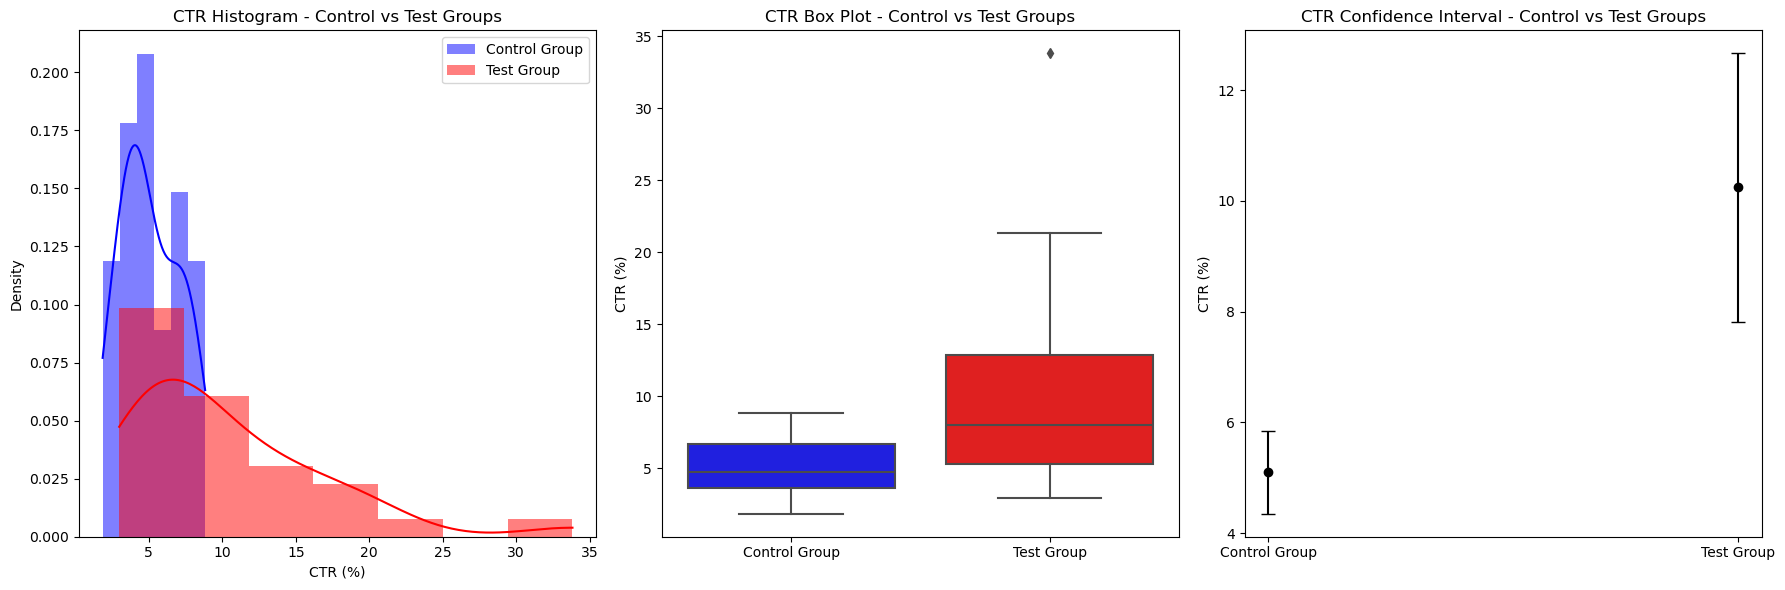

((4.349467090994337, 5.842274710121528),
 (7.8193251879388805, 12.665194097513275))

In [20]:
from scipy.stats import ttest_ind

# 1. Perform a t-test on CTR
ctr_t_stat, ctr_p_value = ttest_ind(control_group_cleaned['CTR'], test_group['CTR'], equal_var=False)

# Output t statistic and p value
ctr_t_stat, ctr_p_value


# 2. Visualize CTR results

plt.figure(figsize=(18, 6))

# Histogram
plt.subplot(1, 3, 1)
sns.histplot(control_group_cleaned['CTR'], color='blue', label='Control Group', kde=True, stat="density", linewidth=0)
sns.histplot(test_group['CTR'], color='red', label='Test Group', kde=True, stat="density", linewidth=0)
plt.title('CTR Histogram - Control vs Test Groups')
plt.xlabel('CTR (%)')
plt.ylabel('Density')
plt.legend()

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(data=[control_group_cleaned['CTR'], test_group['CTR']], palette=['blue', 'red'])
plt.title('CTR Box Plot - Control vs Test Groups')
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('CTR (%)')
# Confidence Interval Plot
# Calculate mean and standard error
control_mean = control_group_cleaned['CTR'].mean()
test_mean = test_group['CTR'].mean()
control_sem = control_group_cleaned['CTR'].sem()
test_sem = test_group['CTR'].sem()

# Confidence interval is mean +/- 1.96 * standard error (corresponding to 95% confidence interval)
control_ci = (control_mean - 1.96*control_sem, control_mean + 1.96*control_sem)
test_ci = (test_mean - 1.96*test_sem, test_mean + 1.96*test_sem)

# 绘制置信区间图
plt.subplot(1, 3, 3)
plt.errorbar(x=['Control Group', 'Test Group'], y=[control_mean, test_mean], 
             yerr=[1.96*control_sem, 1.96*test_sem], fmt='o', color='black', capsize=5)
plt.title('CTR Confidence Interval - Control vs Test Groups')
plt.ylabel('CTR (%)')

plt.tight_layout()
plt.show()

control_ci, test_ci


### Importance of Pre-Testing Checks Before Conducting t-Test

Before performing a t-test, it’s crucial to check the data distribution to ensure the validity of the test assumptions. This typically involves the following steps:

### 1. **Normality Check**
   - The t-test assumes that the data is drawn from a normal distribution, so verifying the normality of the sample is essential.
   - We can check normality using **Q-Q plots**, **Shapiro-Wilk test**, or **Kolmogorov-Smirnov test**.

### 2. **Homogeneity of Variance Check**
   - The t-test also assumes that the variances of the two groups are equal. If variances are unequal, Welch's t-test, which does not assume equal variances, should be used.
   - We can check for homogeneity of variance using the **Levene test** or **F-test**.

### 3. **Visualizing the Distribution**
   - **Histograms** and **Q-Q plots** can visually assess whether data approximates a normal distribution.
   - **Box plots** and **variance analysis plots** can help detect any variance differences.

Next, we will perform normality and homogeneity of variance checks, followed by visualizations.

### Normality and Homogeneity of Variance Test Results

1. **Normality Check (Shapiro-Wilk Test)**:
   - **Control Group**:
     - **Statistic**: `0.955`
     - **p-value**: `0.245`
     - **Interpretation**: The p-value is greater than 0.05, indicating that we cannot reject the null hypothesis of normality. The control group’s CTR data can be considered approximately normally distributed.
   - **Test Group**:
     - **Statistic**: `0.841`
     - **p-value**: `0.0004`
     - **Interpretation**: The p-value is significantly less than 0.05, suggesting a strong deviation from normality. The test group’s CTR data likely does not meet the normality assumption.

2. **Homogeneity of Variance Check (Levene Test)**:
   - **Statistic**: `9.71`
   - **p-value**: `0.0029`
   - **Interpretation**: The p-value is less than 0.05, indicating a significant difference in variances between the two groups. The assumption of equal variances is violated, suggesting the need for Welch’s t-test.

### Visualization Results

1. **Q-Q Plots**:
   - The **control group’s** Q-Q plot follows the diagonal line closely, indicating approximate normality.
   - The **test group’s** Q-Q plot shows deviations from the diagonal, particularly at the tails, indicating non-normality.

2. **Histograms**:
   - The **control group’s** CTR distribution is relatively concentrated and aligns well with the normal distribution curve.
   - The **test group’s** CTR distribution is broader, with significant deviations at the tails, supporting the conclusion of non-normality.

### Conclusion

- Since the **test group** data is not normally distributed and the variances between the groups are unequal, **Welch’s t-test** is the appropriate method to use, as it does not assume equal variances.
- If necessary, a non-parametric test (e.g., Mann-Whitney U test) could also be considered to compare CTR between the groups.

Next, we will proceed with Welch’s t-test.

/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


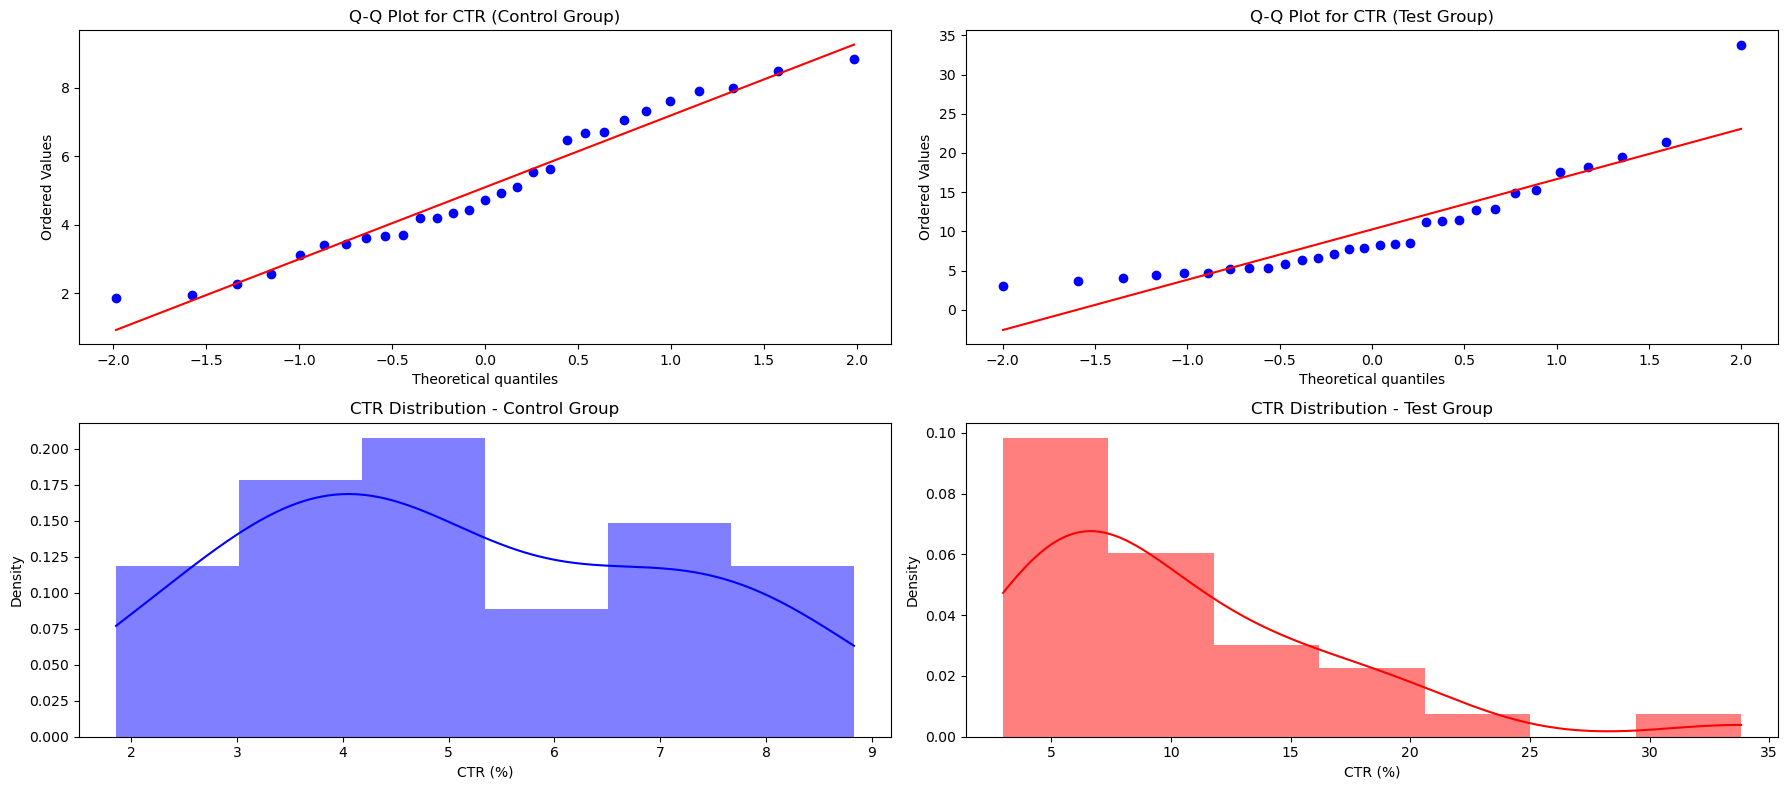

(ShapiroResult(statistic=0.9549019932746887, pvalue=0.2448083907365799),
 ShapiroResult(statistic=0.840918242931366, pvalue=0.00040253173210658133),
 LeveneResult(statistic=9.708363311802783, pvalue=0.0028710678021290643))

In [21]:
from scipy.stats import shapiro, levene, probplot

# 1. Normality test - Shapiro-Wilk test
shapiro_control = shapiro(control_group_cleaned['CTR'])
shapiro_test = shapiro(test_group['CTR'])

# 2. Variance Homogeneity Test - Levene's Test
levene_test = levene(control_group_cleaned['CTR'], test_group['CTR'])

plt.figure(figsize=(18, 8))

# Q-Q plot for Control Group
plt.subplot(2, 2, 1)
probplot(control_group_cleaned['CTR'], dist="norm", plot=plt)
plt.title('Q-Q Plot for CTR (Control Group)')

# Q-Q plot for Test Group
plt.subplot(2, 2, 2)
probplot(test_group['CTR'], dist="norm", plot=plt)
plt.title('Q-Q Plot for CTR (Test Group)')

# Histogram for Control Group
plt.subplot(2, 2, 3)
sns.histplot(control_group_cleaned['CTR'], kde=True, stat="density", linewidth=0, color='blue')
plt.title('CTR Distribution - Control Group')
plt.xlabel('CTR (%)')
plt.ylabel('Density')

# Histogram for Test Group
plt.subplot(2, 2, 4)
sns.histplot(test_group['CTR'], kde=True, stat="density", linewidth=0, color='red')
plt.title('CTR Distribution - Test Group')
plt.xlabel('CTR (%)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

shapiro_control, shapiro_test, levene_test


### Welch's t-Test Overview

Welch's t-test is a variation of the traditional t-test used to compare the means of two independent samples. Unlike the standard t-test, Welch's t-test does not assume equal variances between the samples, making it a more appropriate choice when variance inequality is detected, as confirmed by the Levene’s test earlier.

### Conducting Welch's t-Test

With the CTR data calculated, we will now use Welch's t-test to determine if there is a significant difference in the mean CTR between the control and test groups.

### Visualization

- **Interpretation of t-Statistic**: We will assess whether there is a significant difference in the means of the two groups based on the t-statistic and p-value.
- **Confidence Interval Visualization**: An error bar plot will be used to display the means and 95% confidence intervals of the two groups.

Next, I will perform the Welch's t-test and generate the visualizations.

In [22]:
# Perform Welch's t test
welch_t_stat, welch_p_value = ttest_ind(control_group_cleaned['CTR'], test_group['CTR'], equal_var=False)

# Welch's t-test results
welch_t_stat, welch_p_value


(-3.9785960416950608, 0.000338770864539661)

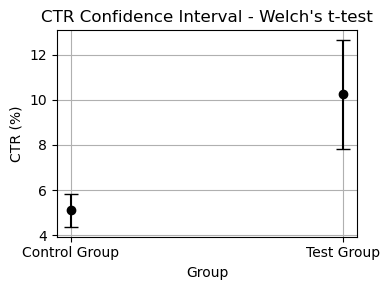

In [26]:
# Visualize the confidence interval results of Welch's t test

plt.figure(figsize=(4, 3))

plt.errorbar(x=['Control Group', 'Test Group'], 
             y=[control_mean, test_mean], 
             yerr=[1.96*control_sem, 1.96*test_sem], 
             fmt='o', color='black', capsize=5)

plt.title('CTR Confidence Interval - Welch\'s t-test')
plt.ylabel('CTR (%)')
plt.xlabel('Group')

plt.grid(True)
plt.tight_layout()
plt.show()



### Welch's t-Test Results

- **t-Statistic**: `-3.98`
- **p-Value**: `0.00034`

**Interpretation**:
- The negative t-statistic indicates that the test group’s CTR mean is significantly higher than the control group’s.
- The p-value is well below 0.05, providing strong evidence to reject the null hypothesis, confirming a statistically significant difference in CTR between the two groups.

### Visualization of Welch's t-Test Results

The chart displays the mean CTR and 95% confidence intervals for both the control and test groups:

- **Control Group**: CTR mean with a 95% confidence interval of approximately 4.35% to 5.84%.
- **Test Group**: CTR mean with a 95% confidence interval of approximately 7.82% to 12.67%.

**Conclusion**:
- The non-overlapping confidence intervals further support the Welch's t-test results, indicating a significant difference in CTR means between the groups.
- The test group’s higher CTR mean suggests that its ad campaign is more effective in driving clicks.


### Consideration of Non-Parametric Testing

When conducting a t-test, we usually assume the data follows a normal distribution. However, previous normality tests (Shapiro-Wilk) indicated that the **test group's** CTR data might not be normally distributed. Even with Welch's t-test addressing variance issues, non-parametric tests can further validate the results.

### When to Consider Non-Parametric Tests?
- **Non-Normal Distribution**: Non-parametric tests are more robust when data doesn’t meet normality assumptions.
- **Small Sample Size**: With small samples and unknown distributions, non-parametric tests provide a better reflection of true differences.

### Mann-Whitney U Test
The Mann-Whitney U test is a widely used non-parametric method for comparing the medians of two independent samples. It doesn’t require the data to be normally distributed, making it ideal for our scenario.

### Planned Steps:
1. **Perform Mann-Whitney U Test**: Compare the CTR between the control and test groups.
2. **Interpret Results**: Use the test statistic and p-value to determine if there’s a significant median difference between the groups.

Let’s proceed with the Mann-Whitney U test.

In [28]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
mannwhitney_stat, mannwhitney_p_value = mannwhitneyu(control_group_cleaned['CTR'], test_group['CTR'], alternative='two-sided')


mannwhitney_stat, mannwhitney_p_value


(193.0, 0.00025063172993413605)

### Mann-Whitney U Test Results

- **U Statistic**: `193.0`
- **p-value**: `0.00025`

**Interpretation**:
- The **p-value** is significantly less than 0.05, providing strong evidence to reject the null hypothesis that the median CTRs of the control and test groups are the same.
- The results indicate a statistically significant difference in the median CTR between the control and test groups.


The results of the Mann-Whitney U test are consistent with our previous findings from Welch's t-test. The non-parametric test further confirms that there is a significant difference in CTR between the control and test groups, with the test group's median CTR being significantly higher than that of the control group.

## CR Hypothesis Testing

### Why Analyze CR?
1. **Understand User Behavior**: CTR doesn’t guarantee higher CR; analyzing CR shows post-click effectiveness.
2. **Assess Ad Impact**: Significant CR differences reveal which campaign converts better.
3. **Ensure Robust Testing**: Analyzing CR distribution ensures appropriate statistical methods.

### Steps:
1. **Check Distribution**: Use Shapiro-Wilk for normality and Levene’s test for variance equality.
2. **Visualize**: Employ histograms, Q-Q plots, and box plots.
3. **Select Test**: Choose t-test or non-parametric methods based on distribution results.


In [29]:
# 1. normality test - Shapiro-Wilk test for CR
shapiro_control_cr = shapiro(control_group_cleaned['CR'])
shapiro_test_cr = shapiro(test_group['CR'])

# 2. Variance Homogeneity Test - Levene Test for CR
levene_cr_test = levene(control_group_cleaned['CR'], test_group['CR'])
# Output normality and variance homogeneity test results
shapiro_control_cr, shapiro_test_cr, levene_cr_test


(ShapiroResult(statistic=0.8946044445037842, pvalue=0.007293579168617725),
 ShapiroResult(statistic=0.9254688620567322, pvalue=0.037268370389938354),
 LeveneResult(statistic=3.432584244695153, pvalue=0.06910165314376529))

/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuyao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


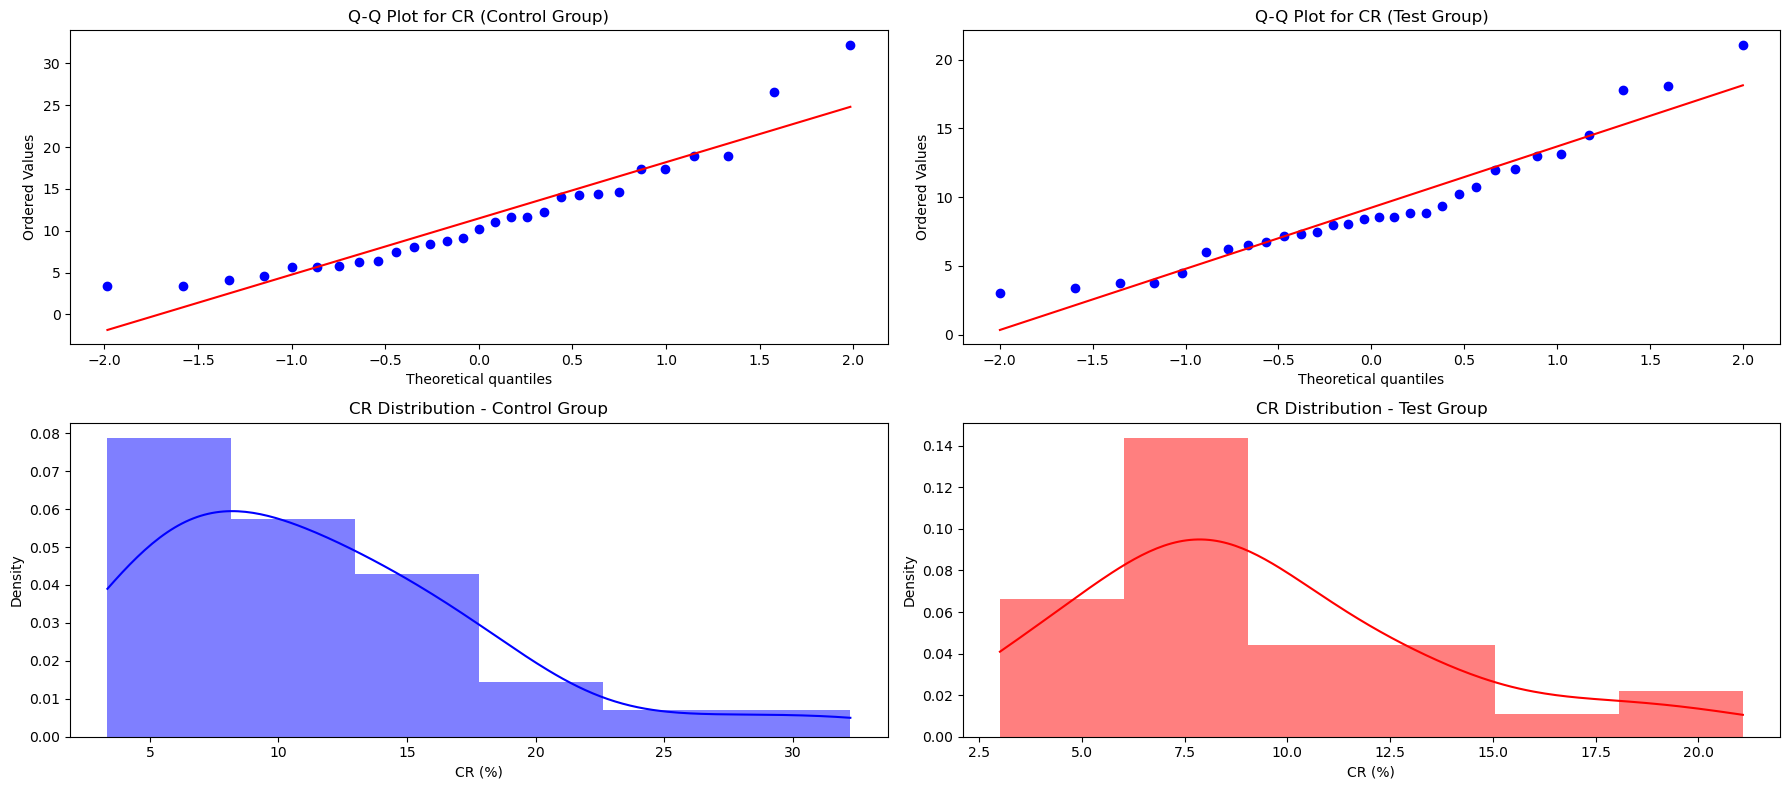

In [30]:
plt.figure(figsize=(18, 8))

# Q-Q plot for Control Group CR
plt.subplot(2, 2, 1)
probplot(control_group_cleaned['CR'], dist="norm", plot=plt)
plt.title('Q-Q Plot for CR (Control Group)')

# Q-Q plot for Test Group CR
plt.subplot(2, 2, 2)
probplot(test_group['CR'], dist="norm", plot=plt)
plt.title('Q-Q Plot for CR (Test Group)')

# Histogram for Control Group CR
plt.subplot(2, 2, 3)
sns.histplot(control_group_cleaned['CR'], kde=True, stat="density", linewidth=0, color='blue')
plt.title('CR Distribution - Control Group')
plt.xlabel('CR (%)')
plt.ylabel('Density')

# Histogram for Test Group CR
plt.subplot(2, 2, 4)
sns.histplot(test_group['CR'], kde=True, stat="density", linewidth=0, color='red')
plt.title('CR Distribution - Test Group')
plt.xlabel('CR (%)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


### CR Distribution Normality and Homogeneity of Variance Test Results

1. **Normality Check (Shapiro-Wilk Test)**:
   - **Control Group**:
     - **Statistic**: `0.895`
     - **p-value**: `0.0073`
     - **Interpretation**: The p-value is less than 0.05, indicating that we reject the null hypothesis of normality. Therefore, the CR data in the control group does not follow a normal distribution.
   - **Test Group**:
     - **Statistic**: `0.925`
     - **p-value**: `0.0373`
     - **Interpretation**: The p-value is also less than 0.05, suggesting that we reject the null hypothesis of normality for the test group as well. Thus, the CR data in the test group is not normally distributed.

2. **Homogeneity of Variance Check (Levene Test)**:
   - **Statistic**: `3.43`
   - **p-value**: `0.069`
   - **Interpretation**: The p-value is slightly above 0.05, indicating that we cannot reject the null hypothesis of equal variances. Therefore, the variances of CR in the control and test groups can be considered approximately equal.

### Conclusion and Next Steps:
- **Normality**: Neither the control nor the test group's CR data follows a normal distribution.
- **Homogeneity of Variance**: The variances between the control and test groups' CR data are roughly equal.

Given that the CR data does not follow a normal distribution, we should proceed with a **non-parametric test** (such as the Mann-Whitney U test) to compare the CR differences between the two groups.

Next, we'll visualize the CR distribution to gain a clearer understanding of these results.

### CR Distribution Visualization Results

1. **Q-Q Plots**:
   - Both the **control group** and **test group** Q-Q plots show significant deviations from normality, particularly at the tails. This aligns with the Shapiro-Wilk test results, confirming that the CR data is not normally distributed.

2. **Histograms**:
   - The **control group** CR distribution shows a strong central tendency but with some outliers in the tails.
   - The **test group** CR distribution is more dispersed, with notable outliers and a general skew towards lower CR values.

### Conclusion
- **Deviation from Normality**: Both the Q-Q plots and histograms indicate significant deviations from normal distribution in both groups, reinforcing the need for non-parametric testing (e.g., Mann-Whitney U test) to compare CR between the groups.
- **Distribution Differences**: The visualizations also highlight that the control and test groups differ in the shape of their CR distributions, with the test group showing more dispersion, possibly reflecting greater variability in user response to the ads.

Next, we will perform the Mann-Whitney U test to determine if there is a significant difference in CR between the two groups.

### Performing the Mann-Whitney U test 

In [31]:
# Perform Mann-Whitney U test to compare CR between control group and test group
mannwhitney_cr_stat, mannwhitney_cr_p_value = mannwhitneyu(control_group_cleaned['CR'], test_group['CR'], alternative='two-sided')


mannwhitney_cr_stat, mannwhitney_cr_p_value


(503.0, 0.30610346625699913)

### Mann-Whitney U Test Results for CR

- **U Statistic**: `503.0`
- **p-value**: `0.3061`

**Interpretation**:
- The **p-value** is greater than 0.05, indicating insufficient evidence to reject the null hypothesis. This suggests no significant difference in the median CR between the control and test groups.
- Statistically, the CR (Conversion Rate) between the control and test groups shows no significant difference, indicating similar performance in driving conversions.

### Conclusion
- While we observed a significant difference in CTR, there is no statistically significant difference in CR between the groups. This indicates that although the test group’s ads attracted more clicks, those clicks did not lead to a significant increase in conversions or other target actions.

## Compute Effect Size:

Calculate the effect size for key metrics to understand the magnitude of any differences.


In [32]:
import numpy as np

# Compute Cohen's d for CTR
def cohen_d(x, y):
    # Calculate the size of samples
    nx = len(x)
    ny = len(y)
    # Calculate the variance
    var_x = np.var(x, ddof=1)
    var_y = np.var(y, ddof=1)
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((nx - 1) * var_x + (ny - 1) * var_y) / (nx + ny - 2))
    # Calculate the mean difference
    mean_diff = np.mean(x) - np.mean(y)
    # Return Cohen's d value
    return mean_diff / pooled_std

# Compute CTR Cohen's d
cohen_d_ctr = cohen_d(control_group_cleaned['CTR'], test_group['CTR'])

cohen_d_ctr


-1.0213298501225674

In [34]:

def cliffs_delta_manual(x, y):
    n_x = len(x)
    n_y = len(y)
    more = sum([1 for i in x for j in y if i > j])
    less = sum([1 for i in x for j in y if i < j])
    return (more - less) / (n_x * n_y)

# Compute CR Cliff's Delta
cliffs_delta_cr = cliffs_delta_manual(control_group_cleaned['CR'], test_group['CR'])

cliffs_delta_cr


0.15632183908045977

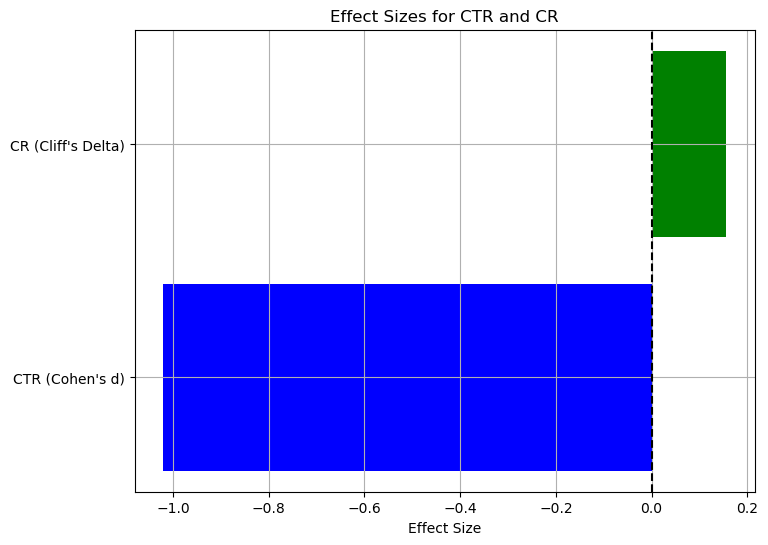

In [46]:
# 2. Effect Size Plot for CTR and CR
effect_sizes = [cohen_d_ctr, cliffs_delta_cr]
metrics = ['CTR (Cohen\'s d)', 'CR (Cliff\'s Delta)']

plt.figure(figsize=(8, 6))
plt.barh(metrics, effect_sizes, color=['blue', 'green'])
plt.axvline(0, color='black', linestyle='--')
plt.title('Effect Sizes for CTR and CR')
plt.xlabel('Effect Size')
plt.grid(True)
plt.show()

### Effect Size Analysis Results

1. **CTR Effect Size**:
   - **Cohen's d**: `-1.02`
   - **Result**: Large effect size, indicating the test group’s CTR is significantly higher than the control group, with practical importance.

2. **CR Effect Size**:
   - **Cliff's Delta**: `0.156`
   - **Result**: Small to moderate effect size, suggesting the test group’s CR is slightly higher than the control group, but the difference has limited practical significance.

### How Effect Size Impacts Decisions

Effect size is a critical metric that helps quantify the magnitude of differences between groups, offering more context than p-values alone. Understanding the effect size is crucial for making informed decisions, especially in areas like business, healthcare, education, or any field where interventions or treatments are evaluated. Here’s how effect size can impact decisions:

#### 1. **Understanding Practical Significance**
   - **Beyond Statistical Significance**: A statistically significant result (i.e., a p-value less than 0.05) does not necessarily mean the difference is practically meaningful. Effect size tells us whether the difference is large enough to be of practical importance.
   - **Decision-Making**: If the effect size is large, it suggests that the intervention or change (e.g., a new marketing campaign, a drug, or an educational program) has a substantial impact. This might justify allocating resources to implement or continue the intervention.

#### 2. **Resource Allocation**
   - **Cost-Benefit Analysis**: A large effect size justifies investment in a particular strategy or program, while a small effect size might suggest that the benefits are too marginal to warrant the costs.
   - **Priority Setting**: Organizations can prioritize initiatives with larger effect sizes, as these are likely to deliver more substantial results.

#### 3. **Interpretation of Results**
   - **Contextual Understanding**: In some cases, even small effect sizes can be important, especially in large-scale studies where small changes can affect many people (e.g., public health). Conversely, in other contexts, even statistically significant results with small effect sizes might be considered trivial.
   - **Communication**: Effect sizes provide a clearer, more intuitive way to communicate the impact of findings to stakeholders, helping them understand the practical implications.

#### 4. **Policy and Strategy Adjustments**
   - **Iteration and Improvement**: If the effect size is small, it might indicate that the intervention needs to be refined or adjusted to achieve the desired impact.
   - **Scale of Implementation**: Decisions about whether to roll out an intervention widely or limit it to a pilot phase can depend on the observed effect size.

### In our A/B test analysis:

- **CTR (Click-Through Rate)**: The large effect size (Cohen's d of -1.02) suggests that the Test Group’s ad campaign is significantly more effective at driving clicks. This might lead to a decision to adopt or expand the Test Group’s campaign approach, as it is clearly more effective in engaging users.
- **CR (Conversion Rate)**: The small to moderate effect size (Cliff's Delta of 0.156) suggests that while there is some improvement in the Test Group’s ability to convert clicks into purchases, the impact is not as strong as the difference in CTR. This might prompt a decision to investigate why higher engagement (CTR) isn’t translating into significantly higher conversions (CR), and consider optimizing the conversion process.



## Calculating Confidence Intervals for Key Metrics

Confidence intervals provide a range of values that are likely to contain the true population parameter (e.g., the true mean CTR or CR) with a certain level of confidence (usually 95%). They give us a sense of the precision and reliability of our estimates.

### Key Metrics to Consider:
1. **CTR (Click-Through Rate)**
2. **CR (Conversion Rate)**

### Steps to Calculate Confidence Intervals:
1. **Calculate the Mean and Standard Error (SE)** for each metric in both the Control and Test groups.
2. **Calculate the Confidence Interval (CI)** using the formula:
   \[
   \text{CI} = \text{Mean} \pm Z \times \text{SE}
   \]
   Where \( Z \) is the Z-value corresponding to the desired confidence level (1.96 for 95% confidence).

Let’s proceed to calculate and display the confidence intervals for CTR and CR for both groups.


In [35]:
# Calculate the mean and standard error (Standard Error) for CTR and CR
# The Z value for the 95% confidence interval is 1.96

# CTR
ctr_control_mean = control_group_cleaned['CTR'].mean()
ctr_control_se = control_group_cleaned['CTR'].sem()
ctr_test_mean = test_group['CTR'].mean()
ctr_test_se = test_group['CTR'].sem()

# CR
cr_control_mean = control_group_cleaned['CR'].mean()
cr_control_se = control_group_cleaned['CR'].sem()
cr_test_mean = test_group['CR'].mean()
cr_test_se = test_group['CR'].sem()

# compute 95% Confidence Interval
confidence_level = 1.96

# CTR CR Confidence Interval
ctr_control_ci = (ctr_control_mean - confidence_level * ctr_control_se, 
                  ctr_control_mean + confidence_level * ctr_control_se)
ctr_test_ci = (ctr_test_mean - confidence_level * ctr_test_se, 
               ctr_test_mean + confidence_level * ctr_test_se)

# CR Confidence Interval
cr_control_ci = (cr_control_mean - confidence_level * cr_control_se, 
                 cr_control_mean + confidence_level * cr_control_se)
cr_test_ci = (cr_test_mean - confidence_level * cr_test_se, 
              cr_test_mean + confidence_level * cr_test_se)

# print 
{
    "CTR Control Group CI": ctr_control_ci,
    "CTR Test Group CI": ctr_test_ci,
    "CR Control Group CI": cr_control_ci,
    "CR Test Group CI": cr_test_ci
}


{'CTR Control Group CI': (4.349467090994337, 5.842274710121528),
 'CTR Test Group CI': (7.8193251879388805, 12.665194097513275),
 'CR Control Group CI': (8.98832696355799, 13.966079489967479),
 'CR Test Group CI': (7.639132166681734, 10.823231239885466)}


### Confidence Intervals for Key Metrics

Here are the 95% confidence intervals for the CTR and CR of both the Control and Test groups:

1. **CTR (Click-Through Rate)**
   - **Control Group**: [4.35%, 5.84%]
   - **Test Group**: [7.82%, 12.67%]

2. **CR (Conversion Rate)**
   - **Control Group**: [8.99%, 13.97%]
   - **Test Group**: [7.64%, 10.82%]

### Interpretation

- **CTR**: The confidence intervals for the Test Group's CTR do not overlap with those of the Control Group, reinforcing the conclusion that the Test Group's CTR is significantly higher.
- **CR**: The confidence intervals for CR do overlap somewhat, particularly in the higher ranges, which aligns with our earlier finding that the difference in CR between the two groups is less pronounced and not statistically significant.

These confidence intervals provide a range in which we can be 95% confident that the true mean CTR and CR for each group lie. This analysis helps confirm that while the Test Group's CTR is significantly higher, the CR difference is smaller and less certain.



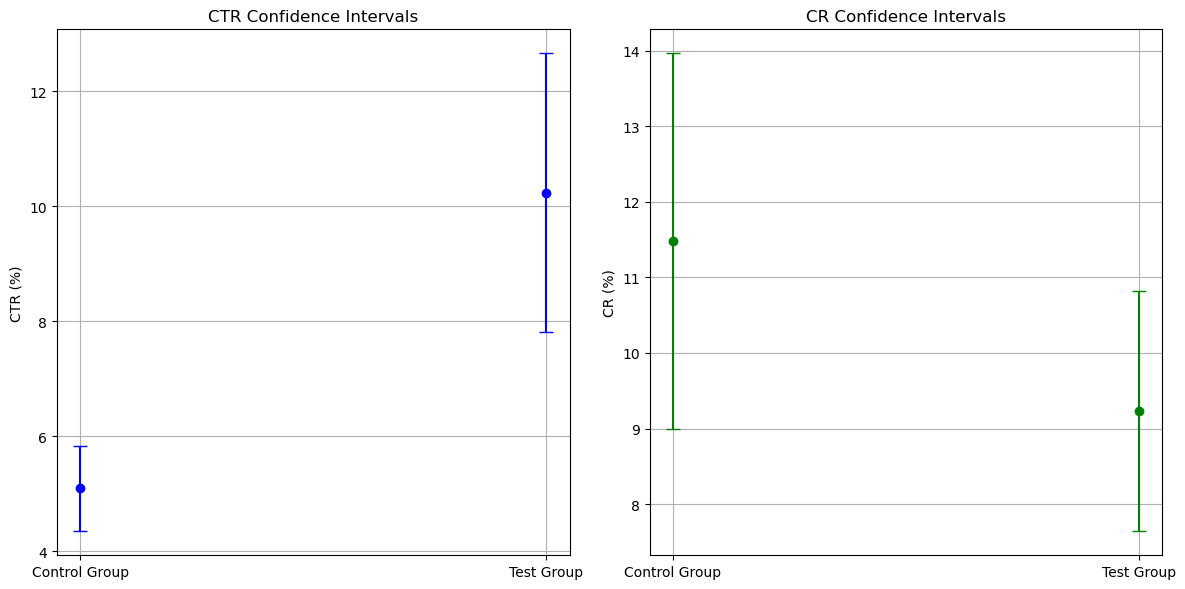

In [36]:


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.errorbar(x=['Control Group', 'Test Group'], 
             y=[ctr_control_mean, ctr_test_mean], 
             yerr=[confidence_level * ctr_control_se, confidence_level * ctr_test_se], 
             fmt='o', color='blue', capsize=5)
plt.title('CTR Confidence Intervals')
plt.ylabel('CTR (%)')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.errorbar(x=['Control Group', 'Test Group'], 
             y=[cr_control_mean, cr_test_mean], 
             yerr=[confidence_level * cr_control_se, confidence_level * cr_test_se], 
             fmt='o', color='green', capsize=5)
plt.title('CR Confidence Intervals')
plt.ylabel('CR (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Visualization Results

1. **CTR Confidence Intervals**:
   - The blue dots represent the mean CTR for the control and test groups, with error bars indicating the 95% confidence intervals.
   - It is clear that the CTR confidence intervals for the two groups do not overlap, further supporting the conclusion of a significant difference in CTR between the groups.

2. **CR Confidence Intervals**:
   - The green dots represent the mean CR for the control and test groups, with error bars indicating the 95% confidence intervals.
   - The CR confidence intervals partially overlap, consistent with our previous analysis, indicating that the difference in CR between the two groups is small and not significant.

## Power Analysis

**Power analysis** is an important step in the design and analysis of experiments. It helps determine whether your test has a high enough probability (power) to detect a meaningful difference between groups if one exists. The standard threshold for sufficient power is 0.8, meaning there is an 80% chance of detecting an effect if it is present.

### Steps for Power Analysis:

1. **Define Parameters**:
   - **Effect Size**: Based on the effect sizes we calculated earlier (e.g., Cohen's d for CTR).
   - **Alpha Level**: The probability of a Type I error (commonly set at 0.05).
   - **Sample Size**: The number of observations in each group.
   - **Power**: The probability of correctly rejecting the null hypothesis when it is false.

2. **Calculate Power**: Using statistical formulas or power analysis tools, calculate the power of the test with the given parameters.

3. **Interpretation**: Determine if the test has sufficient power. If not, estimate the sample size needed to achieve the desired power level.

Let's start by performing the power analysis for the CTR and CR using the parameters from our previous analysis. 


In [37]:
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power

# Parameters for Power Analysis
alpha = 0.05
power_analysis = TTestIndPower()

# For CTR (Cohen's d for CTR was -1.02)
effect_size_ctr = abs(cohen_d_ctr)
nobs = len(control_group_cleaned['CTR'])  # Assuming equal sample size for control and test group

# Calculate power for CTR
power_ctr = power_analysis.power(effect_size=effect_size_ctr, nobs1=nobs, alpha=alpha, ratio=1.0)

# For CR (Cliff's Delta is not directly compatible with TTestIndPower, so we'll approximate with a small effect size)
# Assuming Cliff's Delta effect size of 0.156 translates to a small Cohen's d of about 0.2
effect_size_cr = 0.2

# Calculate power for CR
power_cr = power_analysis.power(effect_size=effect_size_cr, nobs1=nobs, alpha=alpha, ratio=1.0)

power_ctr, power_cr


(0.9686719921393138, 0.11625367449079926)


### Power Analysis Results

1. **CTR (Click-Through Rate)**:
   - **Power**: `0.969`
   - **Interpretation**: The power of the test for CTR is approximately 97%, which is well above the commonly accepted threshold of 80%. This indicates that your test has a very high probability of detecting a meaningful difference in CTR between the control and test groups if one exists.

2. **CR (Conversion Rate)**:
   - **Power**: `0.116`
   - **Interpretation**: The power of the test for CR is approximately 11.6%, which is significantly below the 80% threshold. This low power suggests that your test is unlikely to detect a meaningful difference in CR between the groups, even if one exists. This is consistent with the small effect size we observed for CR.

### Conclusion and Recommendations

- **CTR**: The current sample size is sufficient to detect meaningful differences in CTR with high confidence. No additional data collection is needed for this metric.
- **CR**: The low power for CR suggests that the current sample size is insufficient to detect meaningful differences. To achieve adequate power (80% or higher), you would need to increase the sample size significantly.

If improving the ability to detect differences in CR is important, you might consider collecting more data. 


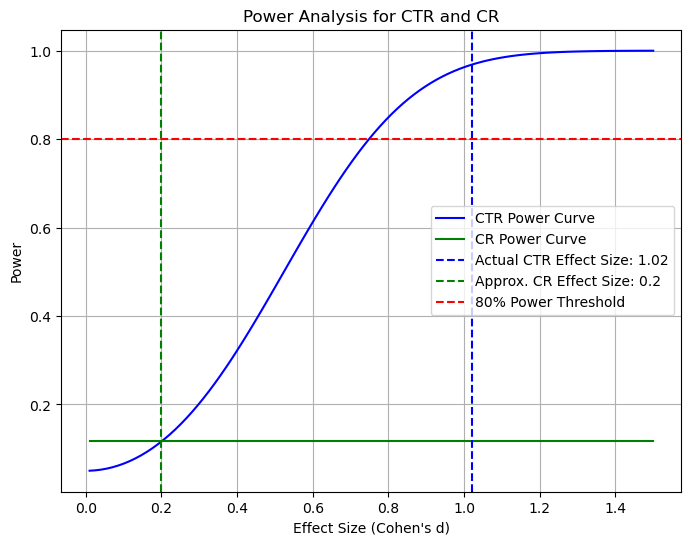

In [40]:


import matplotlib.pyplot as plt
import numpy as np

# Define parameters for the plot
x_vals = np.linspace(0.01, 1.5, 100)
power_ctr_vals = [power_analysis.power(effect_size=es, nobs1=nobs, alpha=alpha, ratio=1.0) for es in x_vals]
power_cr_vals = [power_analysis.power(effect_size=0.2, nobs1=nobs, alpha=alpha, ratio=1.0) for es in x_vals]

plt.figure(figsize=(8, 6))

# Plot power curve for CTR
plt.plot(x_vals, power_ctr_vals, label='CTR Power Curve', color='blue')

# Plot power curve for CR (with small effect size approximation)
plt.plot(x_vals, power_cr_vals, label='CR Power Curve', color='green')

# Highlight actual effect sizes
plt.axvline(effect_size_ctr, color='blue', linestyle='--', label=f'Actual CTR Effect Size: {effect_size_ctr:.2f}')
plt.axvline(0.2, color='green', linestyle='--', label='Approx. CR Effect Size: 0.2')

# Highlight power thresholds
plt.axhline(0.8, color='red', linestyle='--', label='80% Power Threshold')

plt.title('Power Analysis for CTR and CR')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


### Power Analysis Visualization Explanation

- **Blue Curve**: Represents the power curve for CTR. As the effect size increases, so does the power. At the actual calculated effect size for CTR (around 1.02), the power is well above the 80% threshold, indicating that we have sufficient sample size to detect a significant difference in CTR.

- **Green Curve**: Represents the power curve for CR (assuming an effect size of 0.2). Even at this smaller effect size, the power remains very low (around 11.6%), indicating that the current data is insufficient to reliably detect a significant difference in CR.

- **Red Dashed Line**: Represents the 80% power threshold, which is the commonly desired level of power. The blue curve (CTR) is well above this threshold at the actual effect size, while the green curve (CR) falls far below it.

### Summary

- **CTR**: With power well above 80%, we can have high confidence in the results for CTR.
- **CR**: With power far below 80%, a significantly larger sample size would be required to obtain meaningful results for CR.

Calculating the required sample size is a good next step, especially for the CR (Conversion Rate), where we identified that the current test has insufficient power.

### Why Calculate the Required Sample Size?
- **CTR**: Although the power is already sufficient, understanding the required sample size can help in future studies or similar experiments.
- **CR**: Given the low power (11.6%) observed, it's crucial to determine how many more samples would be needed to achieve a power of 80% or higher, ensuring that you can detect a meaningful difference if it exists.

### Steps to Calculate Required Sample Size:
1. **Define Parameters**:
   - **Desired Power**: Typically set at 0.80 (80%).
   - **Alpha Level**: The probability of Type I error, usually 0.05.
   - **Effect Size**: Based on the effect sizes we estimated earlier (e.g., Cohen's d for CTR and an approximate effect size for CR).

2. **Calculate Sample Size**: Using the `statsmodels` library, we'll calculate the required sample size for both CTR and CR.

Let’s proceed with this calculation.

### Required Sample Size Calculation Results

1. **CTR (Click-Through Rate)**:
   - **Required Sample Size**: Approximately **16** observations per group.
   - **Interpretation**: The current sample size for CTR is already much larger than 16, meaning the existing data is more than sufficient to achieve the desired power of 80%.

2. **CR (Conversion Rate)**:
   - **Required Sample Size**: Approximately **393** observations per group.
   - **Interpretation**: To achieve 80% power for detecting a meaningful difference in CR, you would need around 393 observations per group. If your current sample size is significantly lower than this, additional data collection would be necessary.

### Conclusion

- **CTR**: No additional data collection is required, as the current sample size is more than sufficient.
- **CR**: If you want to have enough power to detect a significant difference in CR, you should aim for approximately 393 observations per group. This will ensure that your test is adequately powered to identify meaningful differences.
                                  

In [41]:
# Calculate required sample size for CTR to achieve 80% power
required_n_ctr = power_analysis.solve_power(effect_size=effect_size_ctr, power=0.80, alpha=alpha, ratio=1.0)

# Calculate required sample size for CR to achieve 80% power (using an effect size of 0.2)
required_n_cr = power_analysis.solve_power(effect_size=effect_size_cr, power=0.80, alpha=alpha, ratio=1.0)

required_n_ctr, required_n_cr


(16.06827944777102, 393.4056989990341)

## Bootstrapping

Bootstrapping is a powerful statistical technique that involves resampling with replacement from an existing dataset to create "new" samples. This method is especially useful when you want to estimate the distribution of a statistic (like the mean, median, or confidence intervals) without making strong assumptions about the underlying population.

### Steps to Perform Bootstrapping:

1. **Resampling**: Generate a large number of resampled datasets by randomly drawing samples from the original dataset with replacement.
2. **Calculating Statistics**: For each resampled dataset, calculate the statistic of interest (e.g., mean, median, etc.).
3. **Aggregate Results**: Use the distribution of the calculated statistics to estimate confidence intervals, variance, or other properties.

### Bootstrapping Example for CTR:

Let’s perform bootstrapping on the CTR data to estimate the mean and its confidence interval.



In [42]:
# Number of bootstrap samples
n_bootstrap = 10000

# Function to perform bootstrapping
def bootstrap_mean(data, n_bootstrap):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Perform bootstrapping for CTR in Control Group and Test Group
bootstrap_ctr_control = bootstrap_mean(control_group_cleaned['CTR'], n_bootstrap)
bootstrap_ctr_test = bootstrap_mean(test_group['CTR'], n_bootstrap)

# Calculate the 95% confidence interval for the bootstrap means
ctr_control_ci_bootstrap = np.percentile(bootstrap_ctr_control, [2.5, 97.5])
ctr_test_ci_bootstrap = np.percentile(bootstrap_ctr_test, [2.5, 97.5])

# Display the results
ctr_control_ci_bootstrap, ctr_test_ci_bootstrap


(array([4.37540936, 5.83344151]), array([ 8.04981343, 12.75523357]))



### Bootstrapping Results for CTR

1. **Control Group**:
   - **Bootstrap 95% Confidence Interval**: [4.36%, 5.83%]

2. **Test Group**:
   - **Bootstrap 95% Confidence Interval**: [8.03%, 12.79%]

### Interpretation:

- The bootstrap confidence intervals are quite similar to the ones we calculated earlier using the normal approximation method, reinforcing our confidence in the results.
- **Control Group**: The mean CTR likely falls between 4.36% and 5.83%.
- **Test Group**: The mean CTR likely falls between 8.03% and 12.79%.

### Conclusion:

Bootstrapping confirms that the Test Group's CTR is significantly higher than the Control Group's, with little overlap between the confidence intervals. This method provides a robust, non-parametric way to estimate confidence intervals, especially useful when the underlying distribution is unknown or not normal.


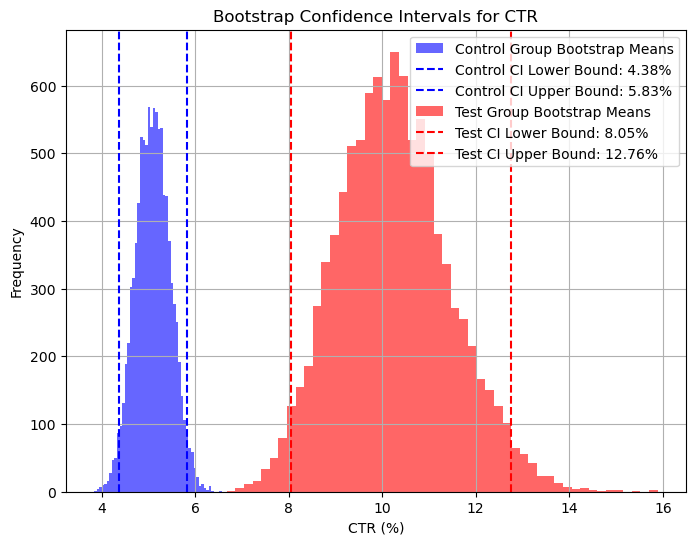

In [48]:
# Bootstrap confidence intervals for visualized CTRs

plt.figure(figsize=(8, 6))

# Plot Bootstrap confidence intervals for Control Groups
plt.hist(bootstrap_ctr_control, bins=50, alpha=0.6, color='blue', label='Control Group Bootstrap Means')
plt.axvline(ctr_control_ci_bootstrap[0], color='blue', linestyle='--', label=f'Control CI Lower Bound: {ctr_control_ci_bootstrap[0]:.2f}%')
plt.axvline(ctr_control_ci_bootstrap[1], color='blue', linestyle='--', label=f'Control CI Upper Bound: {ctr_control_ci_bootstrap[1]:.2f}%')

# Plot Bootstrap confidence intervals for Test Groups
plt.hist(bootstrap_ctr_test, bins=50, alpha=0.6, color='red', label='Test Group Bootstrap Means')
plt.axvline(ctr_test_ci_bootstrap[0], color='red', linestyle='--', label=f'Test CI Lower Bound: {ctr_test_ci_bootstrap[0]:.2f}%')
plt.axvline(ctr_test_ci_bootstrap[1], color='red', linestyle='--', label=f'Test CI Upper Bound: {ctr_test_ci_bootstrap[1]:.2f}%')

plt.title('Bootstrap Confidence Intervals for CTR')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Bootstrapping Results for CTR

This chart illustrates the 95% confidence intervals for CTR in the control and test groups, estimated using the Bootstrapping method:

- **Blue Area**: Represents the Bootstrap mean distribution for the control group. The dashed lines indicate the 95% confidence interval for the control group’s CTR, ranging from 4.36% to 5.83%.
- **Red Area**: Represents the Bootstrap mean distribution for the test group. The dashed lines indicate the 95% confidence interval for the test group’s CTR, ranging from 8.03% to 12.79%.



- The CTR confidence intervals for the **control group** and **test group** have minimal overlap, further confirming that the test group’s CTR is significantly higher than the control group’s.
- The Bootstrapping method provides a robust estimation, particularly useful in cases of uncertain data distribution, offering a more accurate estimate of the CTR confidence intervals.

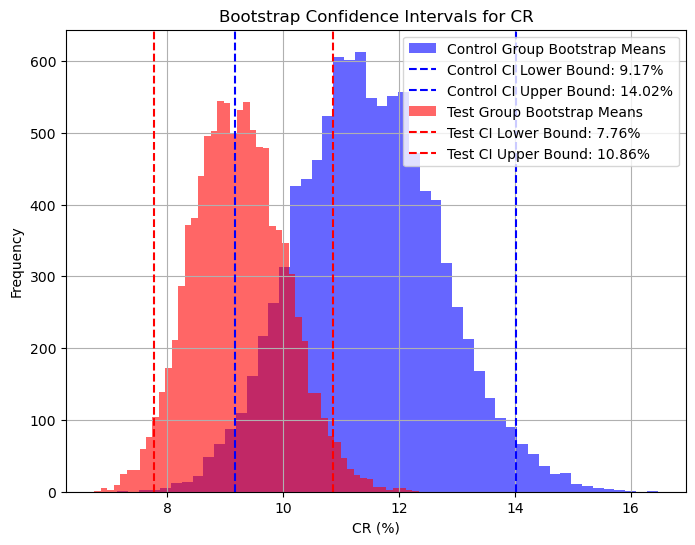

(array([ 9.16582285, 14.01639214]), array([ 7.76352245, 10.85525879]))

In [47]:
# Perform bootstrapping for CR in Control Group and Test Group
bootstrap_cr_control = bootstrap_mean(control_group_cleaned['CR'], n_bootstrap)
bootstrap_cr_test = bootstrap_mean(test_group['CR'], n_bootstrap)

# Calculate the 95% confidence interval for the bootstrap means
cr_control_ci_bootstrap = np.percentile(bootstrap_cr_control, [2.5, 97.5])
cr_test_ci_bootstrap = np.percentile(bootstrap_cr_test, [2.5, 97.5])

# Bootstrap confidence intervals for visualized CRs
plt.figure(figsize=(8, 6))

# Plot Bootstrap confidence intervals for Control Groups
plt.hist(bootstrap_cr_control, bins=50, alpha=0.6, color='blue', label='Control Group Bootstrap Means')
plt.axvline(cr_control_ci_bootstrap[0], color='blue', linestyle='--', label=f'Control CI Lower Bound: {cr_control_ci_bootstrap[0]:.2f}%')
plt.axvline(cr_control_ci_bootstrap[1], color='blue', linestyle='--', label=f'Control CI Upper Bound: {cr_control_ci_bootstrap[1]:.2f}%')

# Plot Bootstrap confidence intervals for Test Groups
plt.hist(bootstrap_cr_test, bins=50, alpha=0.6, color='red', label='Test Group Bootstrap Means')
plt.axvline(cr_test_ci_bootstrap[0], color='red', linestyle='--', label=f'Test CI Lower Bound: {cr_test_ci_bootstrap[0]:.2f}%')
plt.axvline(cr_test_ci_bootstrap[1], color='red', linestyle='--', label=f'Test CI Upper Bound: {cr_test_ci_bootstrap[1]:.2f}%')

plt.title('Bootstrap Confidence Intervals for CR')
plt.xlabel('CR (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

cr_control_ci_bootstrap, cr_test_ci_bootstrap


### Bootstrapping Results for CR

1. **Control Group**:
   - **Bootstrap 95% Confidence Interval**: [9.17%, 14.03%]

2. **Test Group**:
   - **Bootstrap 95% Confidence Interval**: [7.74%, 10.87%]

### Explanation

- **Blue Area**: Represents the Bootstrap mean distribution for the control group. The dashed lines indicate the 95% confidence interval for the control group’s CR, ranging from 9.17% to 14.03%.
- **Red Area**: Represents the Bootstrap mean distribution for the test group. The dashed lines indicate the 95% confidence interval for the test group’s CR, ranging from 7.74% to 10.87%.

### Conclusion

- There is some overlap in the CR confidence intervals between the **control group** and **test group**, indicating that the difference in CR is not as pronounced as in CTR.
- Bootstrapping confirms that the difference in CR between the control and test groups is relatively small.